In [263]:
import pandas as pd
import geocoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
filename1 = 'Data/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported'
filename2 = 'Data/311_Service_Requests_-_Graffiti_Removal'
filename3 = 'Data/311_Service_Requests_-_Pot_Holes_Reported'
filename4 = 'Data/311_Service_Requests_-_Sanitation_Code_Complaints'


df1 = pd.read_csv(filename1 + '.csv', encoding = "ISO-8859-1")
df2 = pd.read_csv(filename2 + '.csv', encoding = "ISO-8859-1")
df3 = pd.read_csv(filename3 + '.csv', encoding = "ISO-8859-1")
df4 = pd.read_csv(filename4 + '.csv', encoding = "ISO-8859-1")

# ANALYSIS OF GRAFFITI DATASET

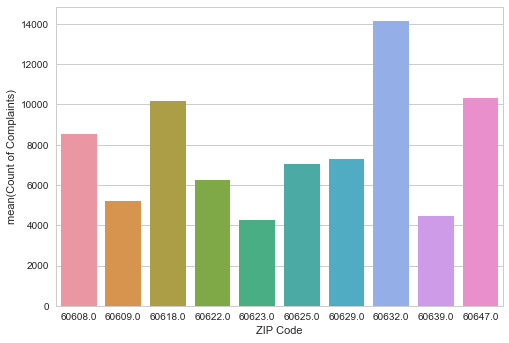

In [203]:
# finding out the worst neighborhoods
counts_df2 = df2['ZIP Code'].value_counts().reset_index()[:10]
counts_df2 = counts_df2.rename(columns = {'ZIP Code':'Count of Complaints', 'index':'ZIP Code'})

#counts_df2
sns.set_style("whitegrid")
ax = sns.barplot(x='ZIP Code', y='Count of Complaints', data=counts_df2)
sns.plt.show()

A value count of ZIP Code shows that the neighborhoods with ZIP Codes 60632, 60647 and 60618 have the highest number of graffiti requests. All of these are also highly residential areas.

In [121]:
#geocoding it to know which neighborhoods are doing the worst when it comes to graffiti complaints
geocoder.google('60632', method='reverse'), geocoder.google('60647', method='reverse'), geocoder.google('60618', method='reverse')

(<[OK] Google - Reverse [4610 S Trumbull Ave, Chicago, IL 60632, USA]>,
 <[OK] Google - Reverse [2926 W Shakespeare Ave, Chicago, IL 60647, USA]>,
 <[OK] Google - Reverse [3612 N Sacramento Ave, Chicago, IL 60618, USA]>)

In [183]:
# which type of surface has high number of requests of graffiti
df_unsorted = df2['ZIP Code'].groupby(df2['What Type of Surface is the Graffiti on?']).count()
df_unsorted = df_unsorted.rename(columns = {'ZIP Code':'Count of Complaints'})

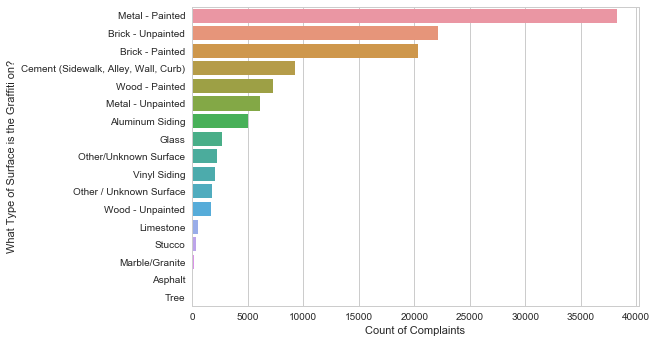

In [211]:
df_unsorted = df_unsorted.sort_values(0, ascending=False).reset_index() # make the graph
sns.set_style("whitegrid")
ax = sns.barplot(x=0, y='What Type of Surface is the Graffiti on?', data=df_unsorted)
ax.set(xlabel='Count of Complaints')
sns.plt.show()

Metal - Painted followed by both types of Brick surfaces (Unpainted and Painted) are the largest types of graffiti requests that the City of Chicago has received.

In [55]:
# output by neighborhoods and graffti types
d = df2.groupby(['What Type of Surface is the Graffiti on?', 'ZIP Code'])['Status'].count().reset_index()
d = d.rename(columns = {'Status':'Count of Complaints'})

In [60]:
d.sort(['Count of Complaints', 'ZIP Code'], ascending=False)[:10]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,What Type of Surface is the Graffiti on?,ZIP Code,Count of Complaints
430,Metal - Painted,60632.0,3633
417,Metal - Painted,60618.0,3503
120,Brick - Painted,60632.0,3334
424,Metal - Painted,60625.0,3172
444,Metal - Painted,60647.0,2861
181,Brick - Unpainted,60632.0,2546
195,Brick - Unpainted,60647.0,2151
407,Metal - Painted,60608.0,2045
168,Brick - Unpainted,60618.0,1839
421,Metal - Painted,60622.0,1800


A close-up analysis into the Surface of Graffiti and ZIP Codes reveal that highest number of complaints in 2016 were received from the neighborhood 60632 regarding Metal-Painted. 60618 registered second highest number of complaints regarding Metal-Painted. It can also be seen from this table that most number of complaints were registered regarding Metal - Painted and Brick - Unpainted - two main problems that the City of Chicago should address.

In [68]:
# caclulating response times

In [69]:
df2['Creation Date'] = df2['Creation Date'].apply(pd.to_datetime)

In [63]:
df2['Completion Date'] = df2['Completion Date'].apply(pd.to_datetime)

In [77]:
df2['Response Time'] = abs(df2['Creation Date'] - df2['Completion Date'])

In [78]:
df2['Response Time'] = df2['Response Time'].astype(pd.Timedelta).apply(lambda l: l.days)

In [66]:
response_time_grouped = df2['Response Time'].groupby(df2['ZIP Code']).mean().reset_index()

In [85]:
response_time_grouped.sort_values('Response Time', ascending=False)

,ZIP Code,Response Time
47,60649.0,1.151163
43,60644.0,1.026087
60,60827.0,1.000000
34,60635.0,1.000000
23,60623.0,0.897810
45,60646.0,0.822222
44,60645.0,0.812968
15,60615.0,0.804444
36,60637.0,0.799127
18,60618.0,0.794129


This table shows that the ZIP Codes of 60649 and 60644 have had relatively high mean response time of requests. Nevertheless, an average response time of 1.15 is still pretty impressive. Identifying neighborhoods of those ZIP codes:

In [82]:
geocoder.google('60649', method='reverse'), geocoder.google('60644', method='reverse')

(<[OK] Google - Reverse [1835 E 72nd St, Chicago, IL 60649, USA]>,
 <[OK] Google - Reverse [37 N Lockwood Ave, Chicago, IL 60644, USA]>)

In [87]:
response_time_grouped.sort_values('Response Time', ascending=True)

,ZIP Code,Response Time
58,60666.0,0.000000
52,60655.0,0.155709
30,60631.0,0.202899
35,60636.0,0.226667
20,60620.0,0.297980
0,0.0,0.309524
4,60604.0,0.381579
22,60622.0,0.426355
59,60707.0,0.438538
53,60656.0,0.443878


This table shows that the ZIP Codes of 60666 and 60655 have had relatively high mean response time of requests. Identifying neighborhoods of those ZIP codes:

In [88]:
geocoder.google('60666', method='reverse'), geocoder.google('60655', method='reverse')

(<[OK] Google - Reverse [W Tankfarm Rd, Chicago, IL 60666, USA]>,
 <[OK] Google - Reverse [10701-10799 S Sacramento Ave, Chicago, IL 60655, USA]>)

In [89]:
# showing output by Police District
grouped_police_RT = df2[['Response Time', 'Latitude', 'Longitude']].groupby(df2['Police District']).mean().reset_index()

In [90]:
grouped_police_RT.sort_values('Response Time', ascending=False)

,Police District,Response Time,Latitude,Longitude
14,15.0,1.027778,41.884990,-87.759824
3,3.0,0.909375,41.773055,-87.593078
10,10.0,0.823660,41.846935,-87.705599
16,17.0,0.723006,41.958610,-87.716446
21,24.0,0.706219,42.002089,-87.682619
2,2.0,0.693305,41.804583,-87.606073
17,18.0,0.676991,41.906441,-87.639164
1,1.0,0.663647,41.876146,-87.628875
19,20.0,0.649154,41.977109,-87.679905
8,8.0,0.625904,41.787953,-87.718773


Police districts number 15, 3 and 10 have a relatively high mean response time i.e. these police districts take a much higher time relatively to respond to grafiti requests than other police districts.

In [91]:
# lat, long of police district 24
geocoder.google(['41.884', '-87.75'], method='reverse')

<[OK] Google - Reverse [175 N Lavergne Ave, Chicago, IL 60644, USA]>

The neighborhood in which the Police takes a higher amount of response time is Lavergne Ave, which is reported not a safe neighborhood of Chicago. The City of Chicago should look into providing more training and resources to the police personnel in this district.

# ANALYSIS OF POT HOLES DATASET

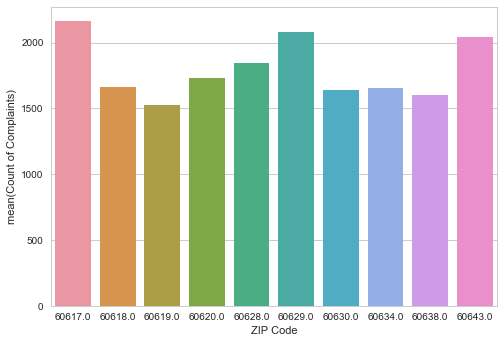

In [208]:
# finding out the worst neighborhoods
counts_df3 = df3['ZIP'].value_counts().reset_index()[:10]
counts_df3 = counts_df3.rename(columns = {'ZIP':'Count of Complaints', 'index':'ZIP Code'})

#counts_df2
sns.set_style("whitegrid")
ax = sns.barplot(x='ZIP Code', y='Count of Complaints', data=counts_df3)
sns.plt.show()

A value count of ZIP Code shows that the neighborhoods with ZIP Codes 60632, 60647 and 60618 have the highest number of graffiti requests. All of these are also highly residential areas.

In [212]:
#geocoding it to know which neighborhoods are doing the worst when it comes to pot holes complaints
geocoder.google('60632', method='reverse'), geocoder.google('60647', method='reverse'), geocoder.google('60618', method='reverse')

(<[OK] Google - Reverse [4610 S Trumbull Ave, Chicago, IL 60632, USA]>,
 <[OK] Google - Reverse [2926 W Shakespeare Ave, Chicago, IL 60647, USA]>,
 <[OK] Google - Reverse [3612 N Sacramento Ave, Chicago, IL 60618, USA]>)

In [232]:
#which type of surface has high number of requests of graffiti
df_unsorted = df3['ZIP'].groupby(df3['STATUS']).count()
df_unsorted = df_unsorted.rename(columns = {'ZIP':'Count of Complaints'})

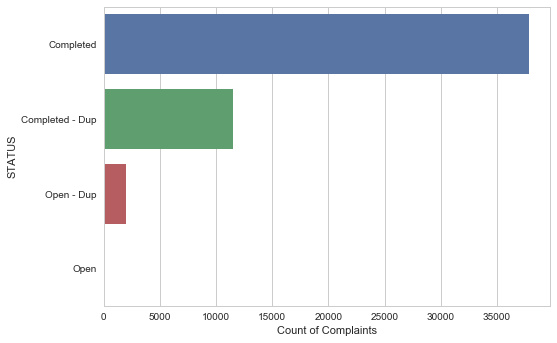

In [233]:
df_unsorted = df_unsorted.sort_values(0, ascending=False).reset_index()
df_unsorted
sns.set_style("whitegrid")
ax = sns.barplot(x=0, y='STATUS', data=df_unsorted)
ax.set(xlabel='Count of Complaints')
sns.plt.show()

In [299]:
# output by neighborhoods and pot holes status types
d = df3.groupby(['STATUS', 'ZIP'])['TYPE OF SERVICE REQUEST'].count().reset_index()
d = d.rename(columns = {'TYPE OF SERVICE REQUEST':'Count of Complaints'})

In [240]:
d.sort(['Count of Complaints', 'ZIP'], ascending=False)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,STATUS,ZIP,Count of Complaints
17,Completed,60617.0,1637
28,Completed,60629.0,1550
42,Completed,60643.0,1542
27,Completed,60628.0,1447
20,Completed,60620.0,1432
19,Completed,60619.0,1223
33,Completed,60634.0,1181
8,Completed,60608.0,1153
37,Completed,60638.0,1136
18,Completed,60618.0,1105


A close-up analysis into the Surface of Graffiti and ZIP Codes reveal that highest number of complaints in 2016 were received from the neighborhood 60632 regarding Metal-Painted. 60618 registered second highest number of complaints regarding Metal-Painted. It can also be seen from this table that most number of complaints were registered regarding Metal - Painted and Brick - Unpainted - two main problems that the City of Chicago should address.

In [ ]:
# caclulating response times

In [ ]:
df3['CREATION DATE'] = df3['CREATION DATE'].apply(pd.to_datetime)

In [ ]:
df3['COMPLETION DATE'] = df3['COMPLETION DATE'].apply(pd.to_datetime)

In [ ]:
df3['Response Time'] = abs(df3['CREATION DATE'] - df3['COMPLETION DATE'])

In [256]:
df3['Response Time'] = df3['Response Time'].astype(pd.Timedelta).apply(lambda l: l.days)

AttributeError: 'NaTType' object has no attribute 'days'

In [271]:
response_time_grouped = df3['Response Time'].groupby(df3['ZIP']).mean().reset_index()

KeyError: 'Response Time'

In [272]:
response_time_grouped.sort_values('Response Time', ascending=False)

,ZIP Code,Response Time
47,60649.0,1.151163
43,60644.0,1.026087
60,60827.0,1.000000
34,60635.0,1.000000
23,60623.0,0.897810
45,60646.0,0.822222
44,60645.0,0.812968
15,60615.0,0.804444
36,60637.0,0.799127
18,60618.0,0.794129


This table shows that the ZIP Codes of 60649 and 60644 have had relatively high mean response time of requests. Nevertheless, an average response time of 1.15 is still pretty impressive. Identifying neighborhoods of those ZIP codes:

In [273]:
geocoder.google('60649', method='reverse'), geocoder.google('60644', method='reverse')

(<[OK] Google - Reverse [1835 E 72nd St, Chicago, IL 60649, USA]>,
 <[OK] Google - Reverse [37 N Lockwood Ave, Chicago, IL 60644, USA]>)

In [274]:
response_time_grouped.sort_values('Response Time', ascending=True)

,ZIP Code,Response Time
58,60666.0,0.000000
52,60655.0,0.155709
30,60631.0,0.202899
35,60636.0,0.226667
20,60620.0,0.297980
0,0.0,0.309524
4,60604.0,0.381579
22,60622.0,0.426355
59,60707.0,0.438538
53,60656.0,0.443878


In [275]:
geocoder.google('60666', method='reverse'), geocoder.google('60655', method='reverse')

(<[OK] Google - Reverse [W Tankfarm Rd, Chicago, IL 60666, USA]>,
 <[OK] Google - Reverse [10701-10799 S Sacramento Ave, Chicago, IL 60655, USA]>)

In [276]:
# showing output by Police District
grouped_police_RT = df3[['Response Time', 'LATITUDE', 'LONGITUDE']].groupby(df3['POLICE DISTRICT']).mean().reset_index()

KeyError: "['Response Time'] not in index"

In [ ]:
grouped_police_RT.sort_values('Response Time', ascending=False)

Police districts number 15, 3 and 10 have a relatively high mean response time i.e. these police districts take a much higher time relatively to respond to grafiti requests than other police districts.

In [247]:
# lat, long of police district 24
geocoder.google(['41.884', '-87.75'], method='reverse')

<[OK] Google - Reverse [175 N Lavergne Ave, Chicago, IL 60644, USA]>

The neighborhood in which the Police takes a higher amount of response time is Lavergne Ave, which is reported not a safe neighborhood of Chicago. The City of Chicago should look into providing more training and resources to the police personnel in this district.

# ANALYSIS OF SANITATION DATASET

In [ ]:
# finding out the worst neighborhoods
counts_df4 = df4['ZIP Code'].value_counts().reset_index()[:10]
counts_df4 = counts_df4.rename(columns = {'ZIP Code':'Count of Complaints', 'index':'ZIP Code'})

#counts_df4
sns.set_style("whitegrid")
ax = sns.barplot(x='ZIP Code', y='Count of Complaints', data=counts_df4)
sns.plt.show()

A value count of ZIP Code shows that the neighborhoods with ZIP Codes 60632, 60647 and 60618 have the highest number of graffiti requests. All of these are also highly residential areas.

In [279]:
#geocoding it to know which neighborhoods are doing the worst when it comes to graffiti complaints
geocoder.google('60632', method='reverse'), geocoder.google('60647', method='reverse'), geocoder.google('60618', method='reverse')

(<[OK] Google - Reverse [4610 S Trumbull Ave, Chicago, IL 60632, USA]>,
 <[OK] Google - Reverse [2926 W Shakespeare Ave, Chicago, IL 60647, USA]>,
 <[OK] Google - Reverse [3612 N Sacramento Ave, Chicago, IL 60618, USA]>)

In [280]:
# output by neighborhoods and graffti types
d = df2.groupby(['What Type of Surface is the Graffiti on?', 'ZIP Code'])['Status'].count().reset_index()
d = d.rename(columns = {'Status':'Count of Complaints'})

In [281]:
df_unsorted = df_unsorted.sort_values(0, ascending=False).reset_index() # make the graph
sns.set_style("whitegrid")
ax = sns.barplot(x=0, y='What Type of Surface is the Graffiti on?', data=df_unsorted)
ax.set(xlabel='Count of Complaints')
sns.plt.show()

ValueError: Could not interpret input 'What Type of Surface is the Graffiti on?'

Metal - Painted followed by both types of Brick surfaces (Unpainted and Painted) are the largest types of graffiti requests that the City of Chicago has received.

In [283]:
# output by neighborhoods and graffti types
d = df2.groupby(['What Type of Surface is the Graffiti on?', 'ZIP Code'])['Status'].count().reset_index()
d = d.rename(columns = {'Status':'Count of Complaints'})

In [284]:
d.sort(['Count of Complaints', 'ZIP Code'], ascending=False)[:10]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,What Type of Surface is the Graffiti on?,ZIP Code,Count of Complaints
430,Metal - Painted,60632.0,3633
417,Metal - Painted,60618.0,3503
120,Brick - Painted,60632.0,3334
424,Metal - Painted,60625.0,3172
444,Metal - Painted,60647.0,2861
181,Brick - Unpainted,60632.0,2546
195,Brick - Unpainted,60647.0,2151
407,Metal - Painted,60608.0,2045
168,Brick - Unpainted,60618.0,1839
421,Metal - Painted,60622.0,1800


A close-up analysis into the Surface of Graffiti and ZIP Codes reveal that highest number of complaints in 2016 were received from the neighborhood 60632 regarding Metal-Painted. 60618 registered second highest number of complaints regarding Metal-Painted. It can also be seen from this table that most number of complaints were registered regarding Metal - Painted and Brick - Unpainted - two main problems that the City of Chicago should address.

#caclulating response times

In [286]:
df2['Creation Date'] = df2['Creation Date'].apply(pd.to_datetime)

In [287]:
df2['Completion Date'] = df2['Completion Date'].apply(pd.to_datetime)

In [288]:
df2['Response Time'] = abs(df2['Creation Date'] - df2['Completion Date'])

In [289]:
df2['Response Time'] = abs(df2['Creation Date'] - df2['Completion Date'])

In [290]:
df2['Response Time'] = df2['Response Time'].astype(pd.Timedelta).apply(lambda l: l.days)

In [291]:
response_time_grouped = df2['Response Time'].groupby(df2['ZIP Code']).mean().reset_index()

In [292]:
response_time_grouped.sort_values('Response Time', ascending=False)

,ZIP Code,Response Time
47,60649.0,1.151163
43,60644.0,1.026087
60,60827.0,1.000000
34,60635.0,1.000000
23,60623.0,0.897810
45,60646.0,0.822222
44,60645.0,0.812968
15,60615.0,0.804444
36,60637.0,0.799127
18,60618.0,0.794129


In [293]:
geocoder.google('60649', method='reverse'), geocoder.google('60644', method='reverse')

(<[OK] Google - Reverse [1835 E 72nd St, Chicago, IL 60649, USA]>,
 <[OK] Google - Reverse [37 N Lockwood Ave, Chicago, IL 60644, USA]>)

In [294]:
# showing output by Police District
grouped_police_RT = df2[['Response Time', 'Latitude', 'Longitude']].groupby(df2['Police District']).mean().reset_index()

Police districts number 15, 3 and 10 have a relatively high mean response time i.e. these police districts take a much higher time relatively to respond to grafiti requests than other police districts.

In [296]:
# lat, long of police district 24
geocoder.google(['41.884', '-87.75'], method='reverse')

<[OK] Google - Reverse [175 N Lavergne Ave, Chicago, IL 60644, USA]>

The neighborhood in which the Police takes a higher amount of response time is Lavergne Ave, which is reported not a safe neighborhood of Chicago. The City of Chicago should look into providing more training and resources to the police personnel in this district.

# Analysis of Vacant Buildings Dataset

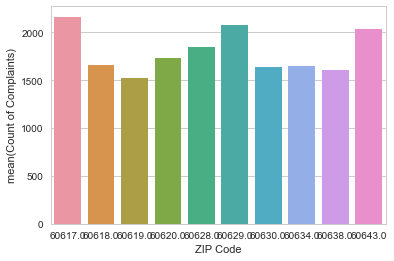

In [308]:
# finding out the worst neighborhoods
counts_df3 = df3['ZIP'].value_counts().reset_index()[:10]
counts_df3 = counts_df3.rename(columns = {'ZIP':'Count of Complaints', 'index':'ZIP Code'})

#counts_df2
sns.set_style("whitegrid")
ax = sns.barplot(x='ZIP Code', y='Count of Complaints', data=counts_df3)
sns.plt.show()

A value count of ZIP Code shows that the neighborhoods with ZIP Codes 60632, 60647 and 60618 have the highest number of graffiti requests. All of these are also highly residential areas.

In [309]:
#which type of surface has high number of requests of graffiti
df_unsorted = df3['ZIP'].groupby(df3['STATUS']).count()
df_unsorted = df_unsorted.rename(columns = {'ZIP':'Count of Complaints'})

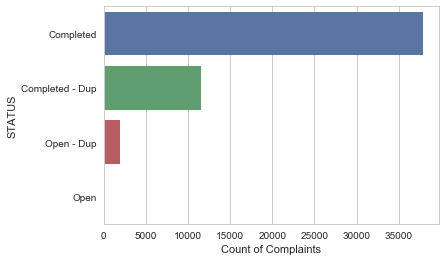

In [310]:
df_unsorted = df_unsorted.sort_values(0, ascending=False).reset_index()
df_unsorted
sns.set_style("whitegrid")
ax = sns.barplot(x=0, y='STATUS', data=df_unsorted)
ax.set(xlabel='Count of Complaints')
sns.plt.show()

In [311]:
# output by neighborhoods and pot holes status types
d = df3.groupby(['STATUS', 'ZIP'])['TYPE OF SERVICE REQUEST'].count().reset_index()
d = d.rename(columns = {'TYPE OF SERVICE REQUEST':'Count of Complaints'})

In [312]:
d.sort(['Count of Complaints', 'ZIP'], ascending=False)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,STATUS,ZIP,Count of Complaints
17,Completed,60617.0,1637
28,Completed,60629.0,1550
42,Completed,60643.0,1542
27,Completed,60628.0,1447
20,Completed,60620.0,1432
19,Completed,60619.0,1223
33,Completed,60634.0,1181
8,Completed,60608.0,1153
37,Completed,60638.0,1136
18,Completed,60618.0,1105


In [ ]:
A close-up analysis into the Surface of Graffiti and ZIP Codes reveal that highest number of complaints in 2016 were received from the neighborhood 60632 regarding Metal-Painted. 60618 registered second highest number of complaints regarding Metal-Painted. It can also be seen from this table that most number of complaints were registered regarding Metal - Painted and Brick - Unpainted - two main problems that the City of Chicago should address.